In [1]:
import numpy as np
import cv2
import PIL 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

In [2]:
def preprocess(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
    
    image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True) 
    
    perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
    listindex=[i for i in range(15) if perimeters[i]>perimeters[0]/2]
    numcards=len(listindex)
    print(numcards)
    imgcont = img.copy()
    [cv2.drawContours(imgcont, [contours[i]], 0, (0,255,0), 5) for i in listindex]
    plt.imshow(imgcont)
    
    
    warp = list(range(numcards))
    
    for i in range(numcards):
        card = contours[i]
        peri = cv2.arcLength(card,True)
        approx = cv2.approxPolyDP(card,0.02*peri,True)
        rect = cv2.minAreaRect(contours[i])
        r = cv2.boxPoints(rect)

        h = np.array([ [0,0],[399,0],[399,399],[0,399] ],np.float32)
        approx = np.array([item for sublist in approx for item in sublist],np.float32)
        print(approx)
        transform = cv2.getPerspectiveTransform(approx,h)
     
        warp = cv2.warpPerspective(img,transform,(400,400))

    # Show perspective correction
    fig = plt.figure(1, (10,10))
    grid = ImageGrid(fig, 111, # similar to subplot(111)
                    nrows_ncols = (4, 4), # creates 2x2 grid of axes
                    axes_pad=0.1, # pad between axes in inch.
                    aspect=True, # do not force aspect='equal'
                    )

    for i in range(numcards):
        grid[i].imshow(warp[i])
    

def showcontour(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
    
    image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True) 
    
    perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
    listindex=[i for i in range(15) if perimeters[i]>perimeters[0]/2]
    numcards=len(listindex)
    imgcont = img.copy()
    [cv2.drawContours(imgcont, [contours[i]], 0, (0,255,0), 5) for i in listindex]
   
    
    return imgcont, contours
 


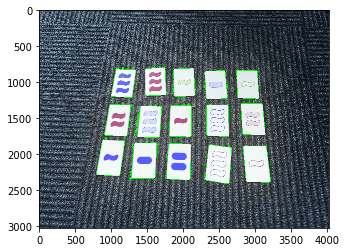

In [5]:
img = cv2.imread('./IMG_1797.JPG',1)
new_img, contour = showcontour(img)
plt.imshow(new_img)

TypeError: Invalid dimensions for image data

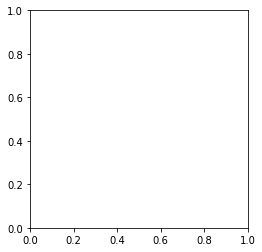

In [7]:
img = cv2.imread('./IMG_1797.JPG',12)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),2)
flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)

image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
new_img= cv2.drawContours(img,contours, -1, (0,255,), 3)
contours = sorted(contours, key=cv2.contourArea,reverse=True)
perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
listindex=[i for i in range(1) if perimeters[i]>perimeters[0]/2]
new_img_2 = [cv2.drawContours(img, [contours[i]], 0, (0,255,0), 5) for i in listindex]
plt.imshow(new_img_2)

x, y = [], []

for contour_line in contours:
    for contour in contour_line:
        x.append(contour[0][0])
        y.append(contour[0][1])

x1, x2, y1, y2 = min(x), max(x), min(y), max(y)



In [ ]:
x = showcontour(frame)
cv2.imshow(x)

In [ ]:

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
ret,thresh = cv2.threshold(img,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

In [ ]:
getCards

In [ ]:
img3 = showcontour(img2)
cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Your code
import numpy as np
import cv2

im = cv2.imread(filepath)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)

# Detect contours using both methods on the same image
img, contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
img, contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Copy over the original image to separate variables
img1 = im.copy()
img2 = im.copy()

# Draw both contours onto the separate images
cv2.drawContours(img1, contours1, -1, (255,0,0), 3)
cv2.drawContours(img2, contours2, -1, (255,0,0), 3)

In [ ]:
imgcont

In [ ]:
out = np.hstack([])

# Now show the image
cv2.imshow('Output', out)
cv2.waitKey(0)
cv2.destroyAllWindows()